# NYC Janurary Tempetures: Prediction Model
### Author: Clayton Seabaugh
[Github Project Repository](https://github.com/ClaytonSeabaughGH/datafun-07-ml)

This project uses Time Seires and Simple Linear Regression to predicti the average high temperature in New York City for January using data from 1895 - 2018. 

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

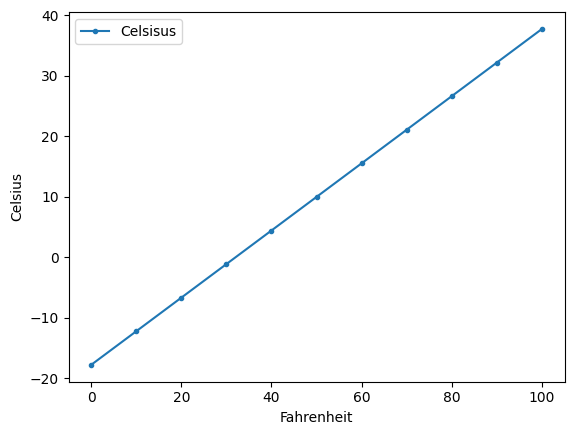

In [5]:
# Formula to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)
    
# Store each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame from list
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsisus'])

# Plot DataFrame into line graph
axes = temps_df.plot(x='Fahrenheit', y='Celsisus', style = '.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 Prediction